In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:/Users/Yunan/Desktop/IS445/Netflix.csv',encoding='latin1')

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


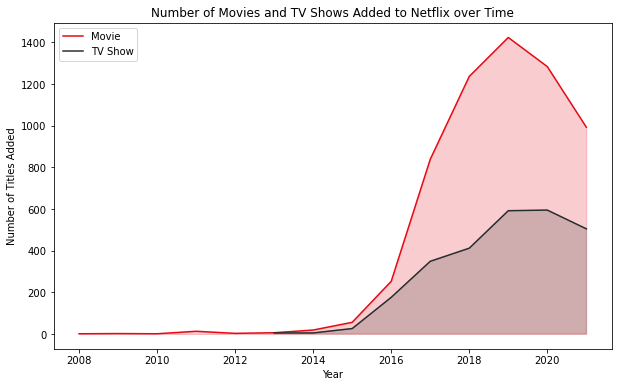

In [8]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from the 'date_added' column and create a new column 'year_added'
df['year_added'] = df['date_added'].dt.year

# Group the dataset by 'type' and 'year_added' and count the number of entries
count_by_type_year = df.groupby(['type', 'year_added']).size().reset_index(name='count')

# Pivot the table to have 'year_added' as the index and 'type' as the columns
count_by_year_type = count_by_type_year.pivot(index='year_added', columns='type', values='count')

# Create a line plot with color filled between the lines
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(count_by_year_type.index, count_by_year_type['Movie'], color='#e50914', label='Movie')
ax.plot(count_by_year_type.index, count_by_year_type['TV Show'], color='#2a2d2e', label='TV Show')
ax.fill_between(count_by_year_type.index, count_by_year_type['Movie'], color='#e50914', alpha=0.2)
ax.fill_between(count_by_year_type.index, count_by_year_type['TV Show'], color='#2a2d2e', alpha=0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles Added')
ax.set_title('Number of Movies and TV Shows Added to Netflix over Time')
ax.legend()
plt.show()

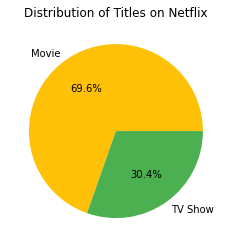

In [9]:
#Pie chart of the distribution of TV shows and movies
type_counts = netflix['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['#FFC107', '#4CAF50'])
plt.title('Distribution of Titles on Netflix')
plt.show()

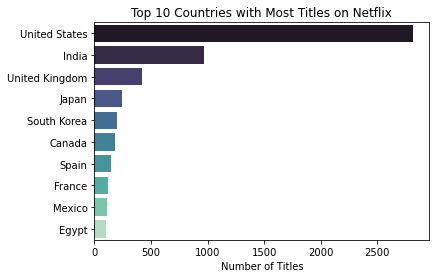

In [10]:
# Count the number of titles by country and plot the top 10 countries
country_counts = netflix['country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='mako')
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.show()